<a href="https://colab.research.google.com/github/khushbookk/Heart_Disease_Classification/blob/main/heart_disease_cleveland.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Libraries used

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

#  .data to .csv

In [ ]:
cols = ['age', 'sex', 'cp', 'restbp', 'cholesterol', 'fbs>120', 'restecg', 'thalach',
                    'exang', 'oldpeak', 'slope', 'ColVessels', 'thalassemia', 'disease']

df = pd.read_table("/content/drive/MyDrive/Heart_Disease_Dataset/processed.cleveland.data",
                   sep=',', encoding='latin',
                   names=cols)

In [ ]:
Catg = ["sex","cp","fbs>120","restecg","exang","slope","thal","num","ColVessels"]
Cont = ["age","restbp","cholesterol","thalach","oldpeak","ColVessels"]

In [ ]:
!rm '/content/drive/MyDrive/cleveland_heart_disease/processed_cleveland.csv'

In [ ]:
df.to_csv("/content/drive/MyDrive/cleveland_heart_disease/processed_cleveland.csv",index=False)

In [ ]:
df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


# Fill Missing Values

In [ ]:
df=df.replace("?", np.nan)

In [ ]:
df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
print("MISSING VALUES\n=========cleveland========")
for i in df.columns:
	# count number of rows with missing values
	n_miss = df[i].isnull().sum()
	perc = n_miss / df.shape[0] * 100
	print(f'{i} : {n_miss} (%.1f%%)' % (perc))

MISSING VALUES
=========cleveland========
age : 0 (0.0%)
sex : 0 (0.0%)
cp : 0 (0.0%)
restbp : 0 (0.0%)
cholesterol : 0 (0.0%)
fbs>120 : 0 (0.0%)
restecg : 0 (0.0%)
thalach : 0 (0.0%)
exang : 0 (0.0%)
oldpeak : 0 (0.0%)
slope : 0 (0.0%)
ColVessels : 4 (1.3%)
thalassemia : 2 (0.7%)
disease : 0 (0.0%)


In [ ]:
df_MeanMode= df
df_MeanMode.fillna({
           'ColVessels':df['ColVessels'].mode()[0],
           'thalassemia':df['thalassemia'].mode()[0]},
          inplace=True)

In [ ]:
df_MeanMode

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
df=df_MeanMode

# Relabelling of Dataset

0  - no disease\
1,2,3,4 - disease present


---



In [ ]:
df['disease'] = df['disease'].replace([2,3,4], [1,1,1])

# Replacing numeric values in categorical columns

In [ ]:
df = df.apply(pd.to_numeric)
df = df.astype({'age':int, 'sex':object, 'cp':object, 'restbp':float, 'cholesterol':float,
                'fbs>120':object,'restecg':object, 'thalach':float, 'exang':object,'oldpeak':float, 
                'slope':object,'ColVessels':object , 'thalassemia':object, 'disease':"category"})

In [ ]:
df['disease'] = df['disease'].replace([0,1], ["no","yes"])
df['sex'] = df['sex'].replace([0,1],["female","male"])
df["cp"]=df["cp"].replace([1,2,3,4],["typical angina","atypical angina","non-anginal pain","asymptomatic"])
df["fbs>120"]=df["fbs>120"].replace([0,1],["no","yes"])
df["restecg"]=df["restecg"].replace([0,1,2],["normal","ST-T wave abnormality","left ventricular hypertrophy"])
df["exang"]=df["exang"].replace([0,1],["no","yes"])
df["slope"]=df["slope"].replace([1,2,3],["upsloping","flat","downsloping"])  
df["ColVessels"]=df["ColVessels"].replace([0,1,2,3],["zero","one","two","three"])   
df["thalassemia"]=df["thalassemia"].replace([3,6,7],["normal","fixed defect","reversable defect"])                                               

In [ ]:
df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63,male,typical angina,145.0,233.0,yes,left ventricular hypertrophy,150.0,no,2.3,downsloping,zero,fixed defect,no
1,67,male,asymptomatic,160.0,286.0,no,left ventricular hypertrophy,108.0,yes,1.5,flat,three,normal,yes
2,67,male,asymptomatic,120.0,229.0,no,left ventricular hypertrophy,129.0,yes,2.6,flat,two,reversable defect,yes
3,37,male,non-anginal pain,130.0,250.0,no,normal,187.0,no,3.5,downsloping,zero,normal,no
4,41,female,atypical angina,130.0,204.0,no,left ventricular hypertrophy,172.0,no,1.4,upsloping,zero,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,typical angina,110.0,264.0,no,normal,132.0,no,1.2,flat,zero,reversable defect,yes
299,68,male,asymptomatic,144.0,193.0,yes,normal,141.0,no,3.4,flat,two,reversable defect,yes
300,57,male,asymptomatic,130.0,131.0,no,normal,115.0,yes,1.2,flat,one,reversable defect,yes
301,57,female,atypical angina,130.0,236.0,no,left ventricular hypertrophy,174.0,no,0.0,flat,one,normal,yes


In [ ]:
df.to_csv("/content/drive/MyDrive/cleveland_heart_disease/Relabelled_Preprocessed_Cleveland.csv",index=False)

# Load Dataset

In [ ]:
dataPath = '/content/drive/MyDrive/cleveland_heart_disease/Relabelled_Preprocessed_Cleveland.csv'
df = pd.read_csv(dataPath, index_col=False)
# df = df.astype({'age':int, 'sex':object, 'cp':object, 'trestbps':float, 'chol':float, 'fbs':object,
#                   'restecg':object, 'thalach':float, 'exang':object, 'oldpeak':float, 'slope':object,
#                   'ca':object, 'thal':object, 'disease':"category"})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   restbp       303 non-null    float64
 4   cholesterol  303 non-null    float64
 5   fbs>120      303 non-null    object 
 6   restecg      303 non-null    object 
 7   thalach      303 non-null    float64
 8   exang        303 non-null    object 
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    object 
 11  ColVessels   303 non-null    object 
 12  thalassemia  303 non-null    object 
 13  disease      303 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 33.3+ KB


In [ ]:
df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63,male,typical angina,145.0,233.0,yes,left ventricular hypertrophy,150.0,no,2.3,downsloping,zero,fixed defect,no
1,67,male,asymptomatic,160.0,286.0,no,left ventricular hypertrophy,108.0,yes,1.5,flat,three,normal,yes
2,67,male,asymptomatic,120.0,229.0,no,left ventricular hypertrophy,129.0,yes,2.6,flat,two,reversable defect,yes
3,37,male,non-anginal pain,130.0,250.0,no,normal,187.0,no,3.5,downsloping,zero,normal,no
4,41,female,atypical angina,130.0,204.0,no,left ventricular hypertrophy,172.0,no,1.4,upsloping,zero,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,typical angina,110.0,264.0,no,normal,132.0,no,1.2,flat,zero,reversable defect,yes
299,68,male,asymptomatic,144.0,193.0,yes,normal,141.0,no,3.4,flat,two,reversable defect,yes
300,57,male,asymptomatic,130.0,131.0,no,normal,115.0,yes,1.2,flat,one,reversable defect,yes
301,57,female,atypical angina,130.0,236.0,no,left ventricular hypertrophy,174.0,no,0.0,flat,one,normal,yes


# EDA

# Dataset Info

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   restbp       303 non-null    float64
 4   cholesterol  303 non-null    float64
 5   fbs>120      303 non-null    object 
 6   restecg      303 non-null    object 
 7   thalach      303 non-null    float64
 8   exang        303 non-null    object 
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    object 
 11  ColVessels   303 non-null    object 
 12  thalassemia  303 non-null    object 
 13  disease      303 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 33.3+ KB


# Attribute types

In [ ]:
continuous_features = df.select_dtypes(include=['int64','float64']).columns
print("continuous_features : \n",list(continuous_features))
non_continuous_features = df.select_dtypes(include=['object']).columns
print("\nnon_continuous_features : \n",list(non_continuous_features))

continuous_features : 
 ['age', 'restbp', 'cholesterol', 'thalach', 'oldpeak']

non_continuous_features : 
 ['sex', 'cp', 'fbs>120', 'restecg', 'exang', 'slope', 'ColVessels', 'thalassemia', 'disease']


# set sns style

In [ ]:
# style must be one of white, dark, whitegrid, darkgrid, ticks
sns.set(style="whitegrid")

# 1. Continuous Features


# five point summary

In [ ]:
df.describe()

,age,restbp,cholesterol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,131.689769,246.693069,149.607261,1.039604
std,9.038662,17.599748,51.776918,22.875003,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,48.000000,120.000000,211.000000,133.500000,0.000000
50%,56.000000,130.000000,241.000000,153.000000,0.800000
75%,61.000000,140.000000,275.000000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


# Univariate Box plots

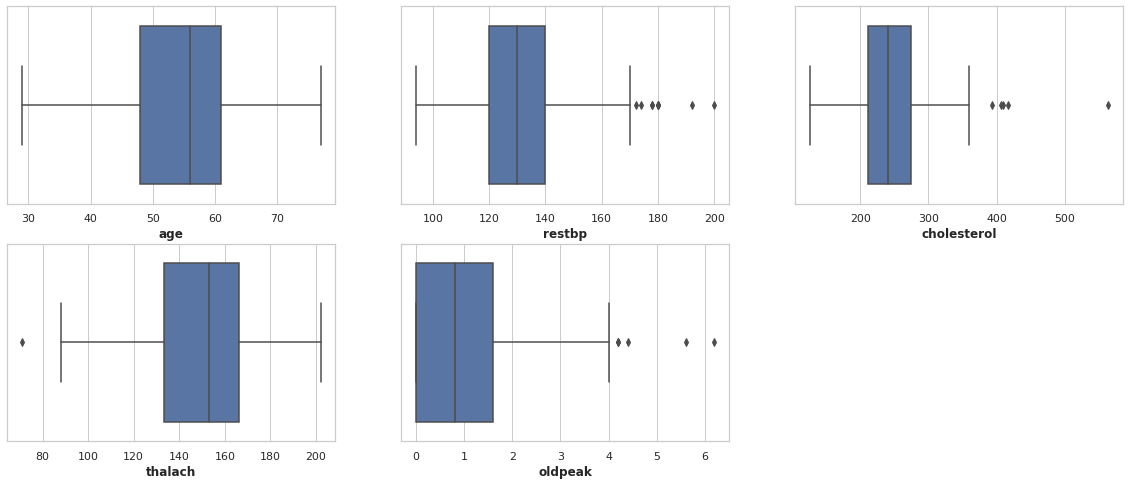

In [ ]:
fig = plt.figure(figsize = (20,8))

dfCont = df.select_dtypes([int,float])
n = len(dfCont.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCont.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, data=df)


# Outliers

In [ ]:
dfCont = df.select_dtypes([int,float])

for i, col in enumerate(dfCont.columns):
    print("\n", "*" * 60)
    print(f"{col}")
    Q1 = np.percentile(df[col], 25)
    Q3 = np.percentile(df[col], 75)
    IQR = Q3 - Q1

    outliers = [x for x in df[col] if x < (Q1-1.5*IQR) or x > (Q3+1.5*IQR)]
    print(f'Identified outliers :', outliers)
    print(f'length :', len(outliers))


 ************************************************************
age
Identified outliers : []
length : 0

 ************************************************************
restbp
Identified outliers : [172.0, 180.0, 200.0, 174.0, 178.0, 192.0, 180.0, 178.0, 180.0]
length : 9

 ************************************************************
cholesterol
Identified outliers : [417.0, 407.0, 564.0, 394.0, 409.0]
length : 5

 ************************************************************
thalach
Identified outliers : [71.0]
length : 1

 ************************************************************
oldpeak
Identified outliers : [6.2, 5.6, 4.2, 4.2, 4.4]
length : 5


# Bivariate Boxplots

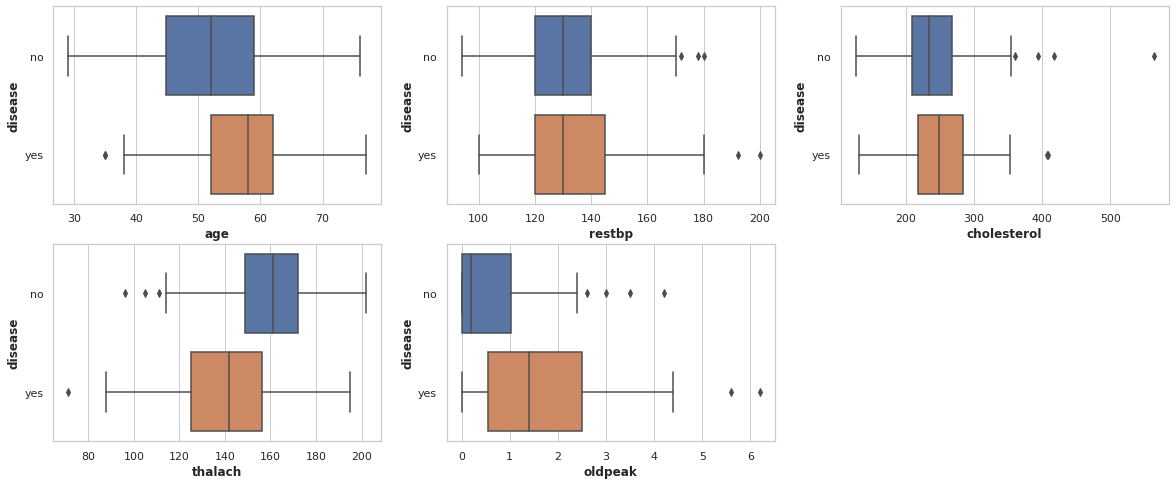

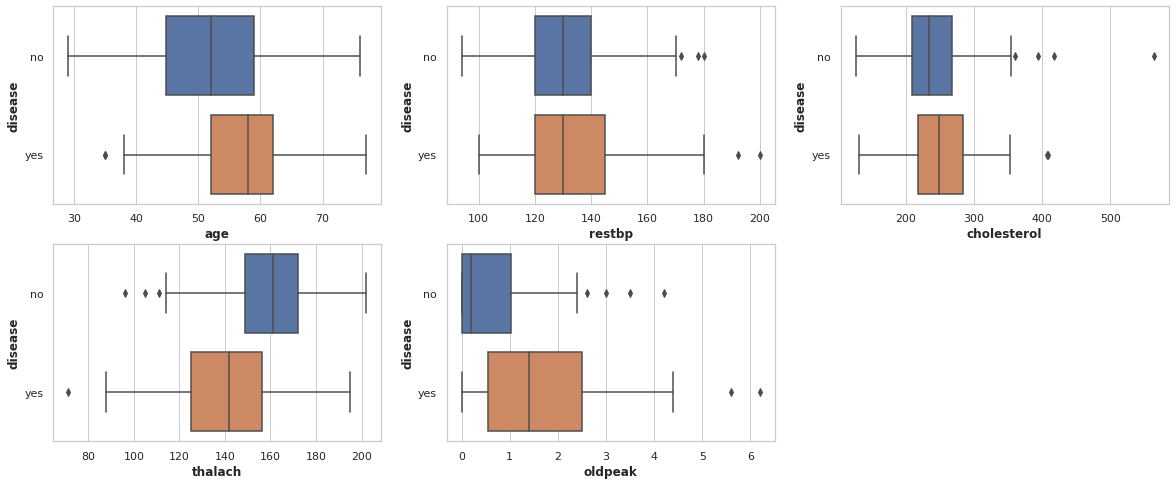

In [ ]:
fig = plt.figure(figsize = (20,8))

dfCont = df.select_dtypes([int,float])
n = len(dfCont.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCont.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y="disease", data=df)


# Distribution plots - Density plots - univariate analysis

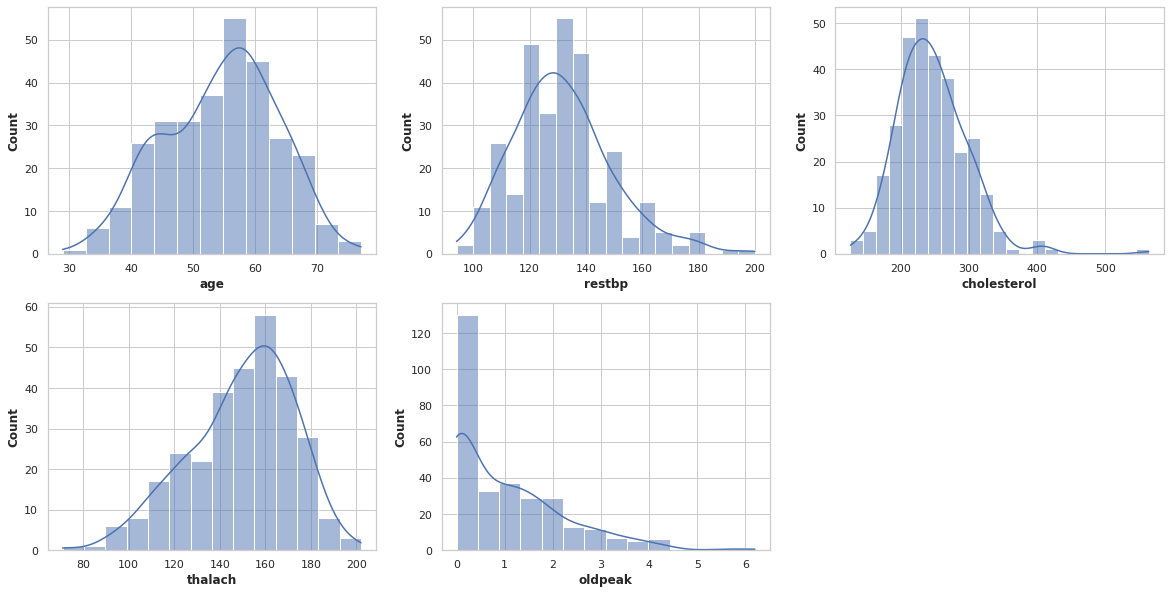

In [ ]:
fig = plt.figure(figsize = (20,10))

dfCont = df.select_dtypes([int,float])

n = len(dfCont.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)


for i, col in enumerate(dfCont.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.histplot(data=df,x=col,kde=True)

In [ ]:
dfCont = df.select_dtypes([int,float])
print("--SKEWNESS--")
for col in dfCont.columns:
    mean=np.mean(df[col])
    median=np.median(df[col])
    sd = np.std(df[col])
    skew = 3* ( ( np.sqrt(mean) - np.sqrt(median) ) / np.sqrt(sd) )
    print(f"{col} : {skew}")

--SKEWNESS--
age : -0.10490141141353079
restbp : 0.05286255876781963
cholesterol : 0.07606373717121923
thalach : -0.08657694043927919
oldpeak : 0.3488138501222826


# Bivariate Distribution - displot

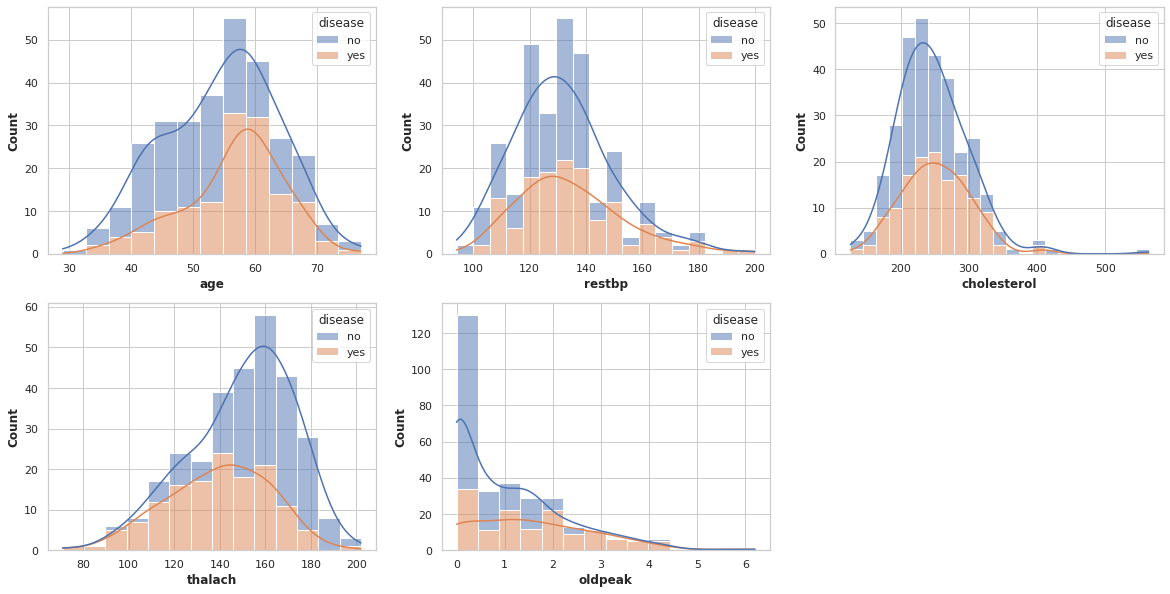

In [ ]:
fig = plt.figure(figsize = (20,10))

dfCont = df.select_dtypes([int,float])

n = len(dfCont.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCont.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.histplot(data=df, x=col, hue="disease",multiple="stack",
                 legend=True,kde=True)

# Multivariate analysis - pairplot

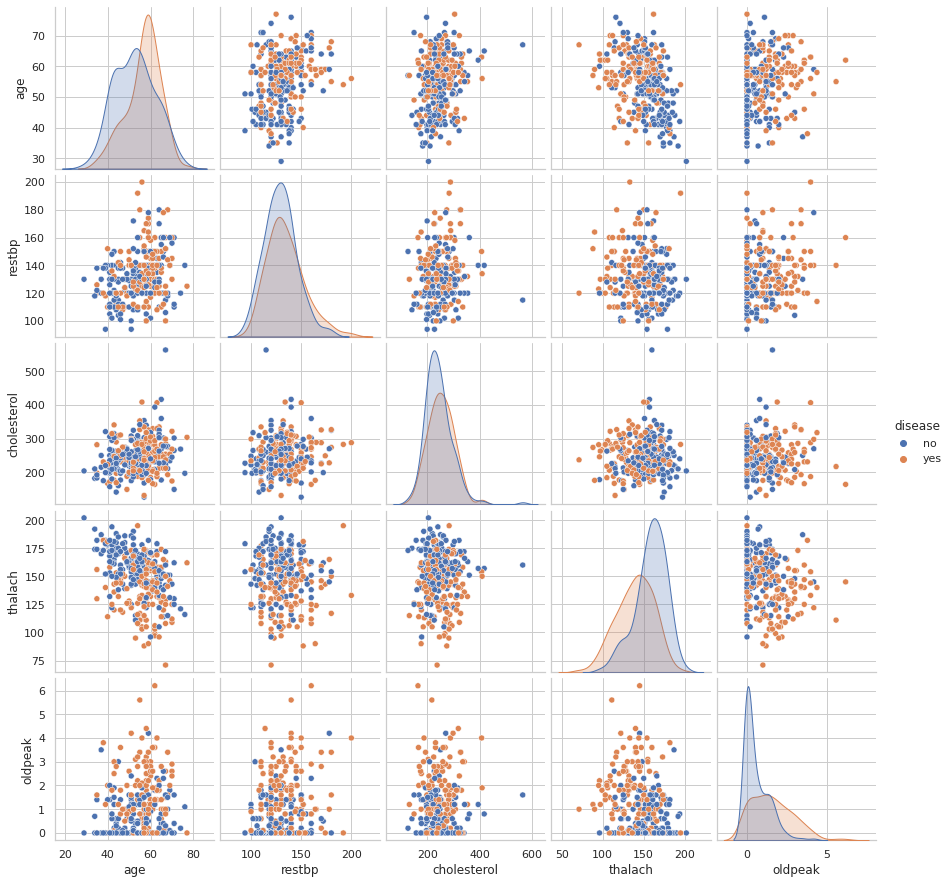

In [ ]:
sns.pairplot(df, hue="disease")

# Multivariate analysis - heat map

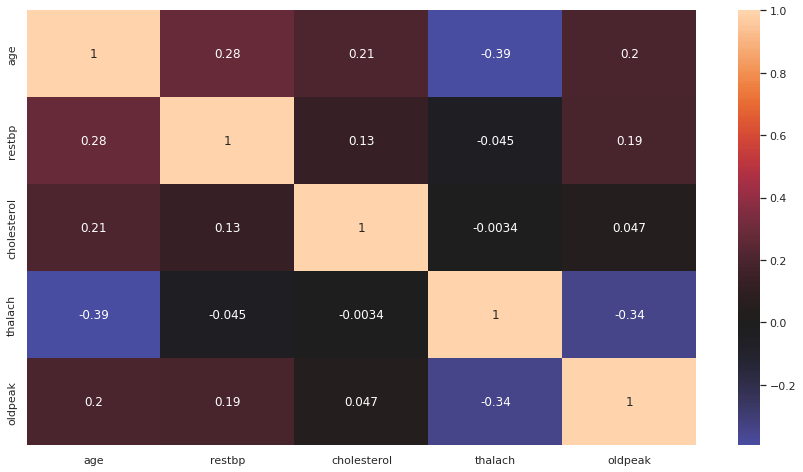

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), annot=True,center = 0)
plt.show()

# Categorical Features

# Univariate - Estimate plots - Count plot

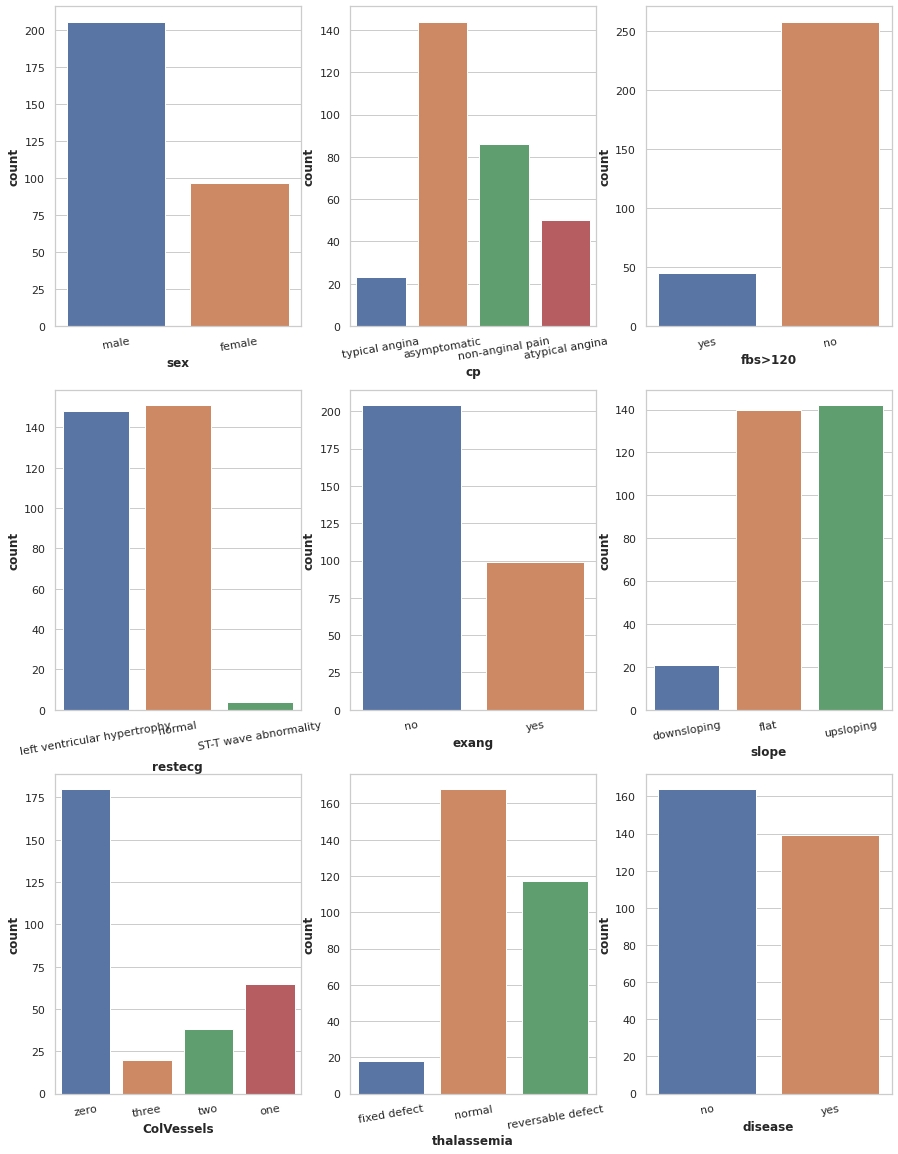

In [ ]:
fig = plt.figure(figsize = (15,20))

dfCatg = df.select_dtypes([object])

n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=10)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.countplot(x=col,data=df)


# Bivariate estimate plot - count plot

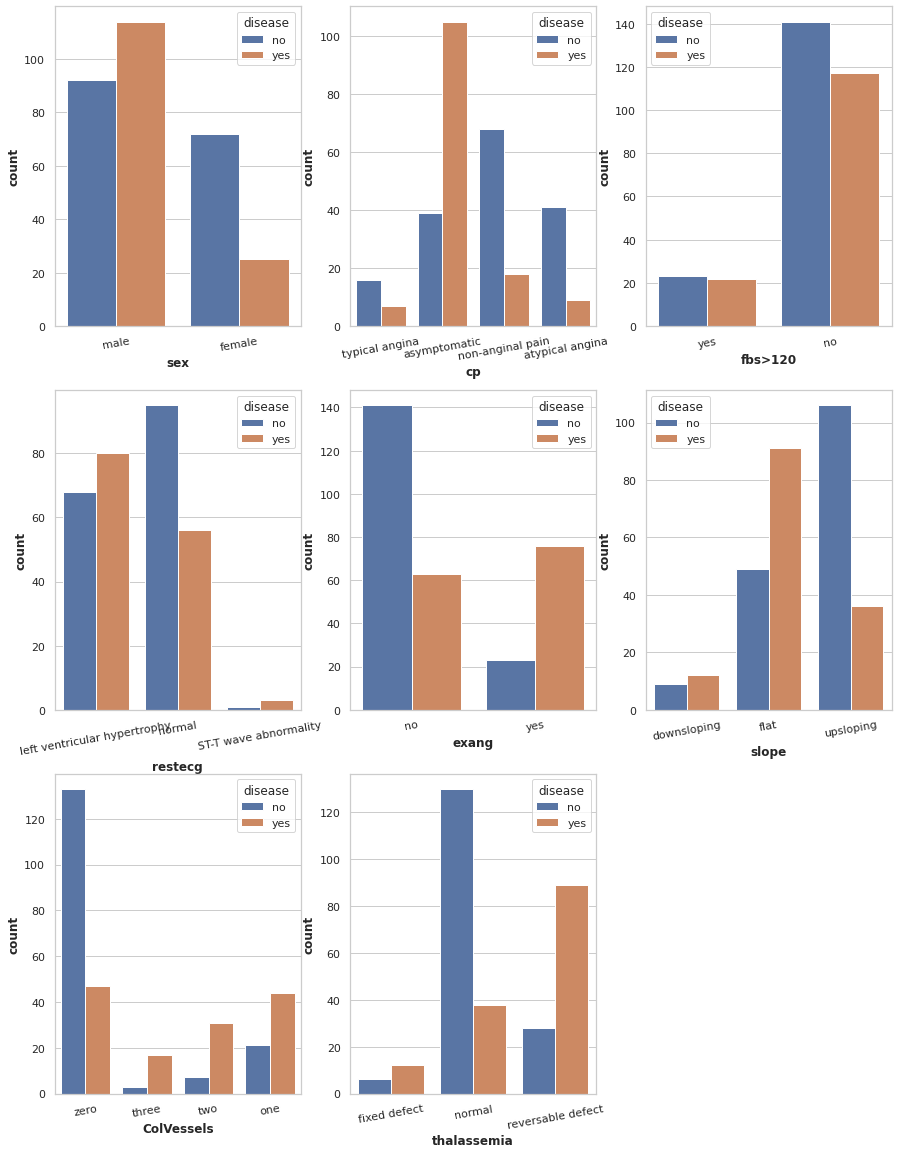

In [ ]:
fig = plt.figure(figsize = (15,20))

dfCatg = df.select_dtypes([object])
dfX = dfCatg.iloc[: , : -1]

n = len(dfX.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfX.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=10)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.countplot(x=col, data=df,hue="disease")


# Bivariate scatter plots - swarm plots - categorical vs age (hue-disease)

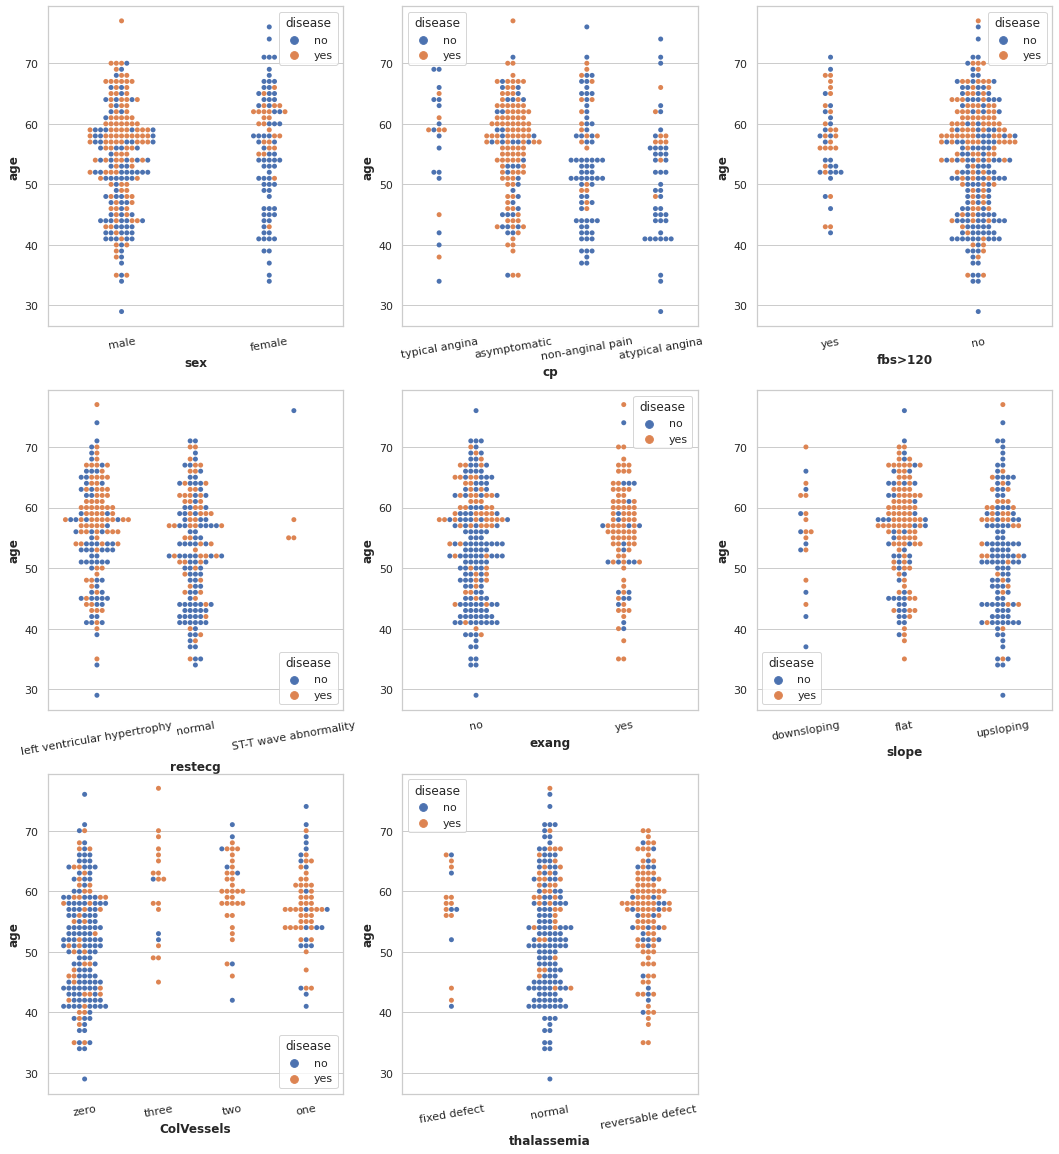

In [ ]:
fig = plt.figure(figsize = (18,20))

dfCatg = df.select_dtypes([object])
dfX = dfCatg.iloc[: , : -1]

n = len(dfX.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfX.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=10)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.swarmplot(x=col, y="age", data=df,hue="disease")


# Analysis - Continuous features with Categorical features

In [ ]:
continuous_features = ['age', 'restbp', 'cholesterol', 'thalach', 'oldpeak']

categorical_features = ['sex', 'cp', 'fbs>120', 'restecg', 'exang', 'slope', 'ColVessels', 'thalassemia', 'disease']

# Boxplot - age vs categorical

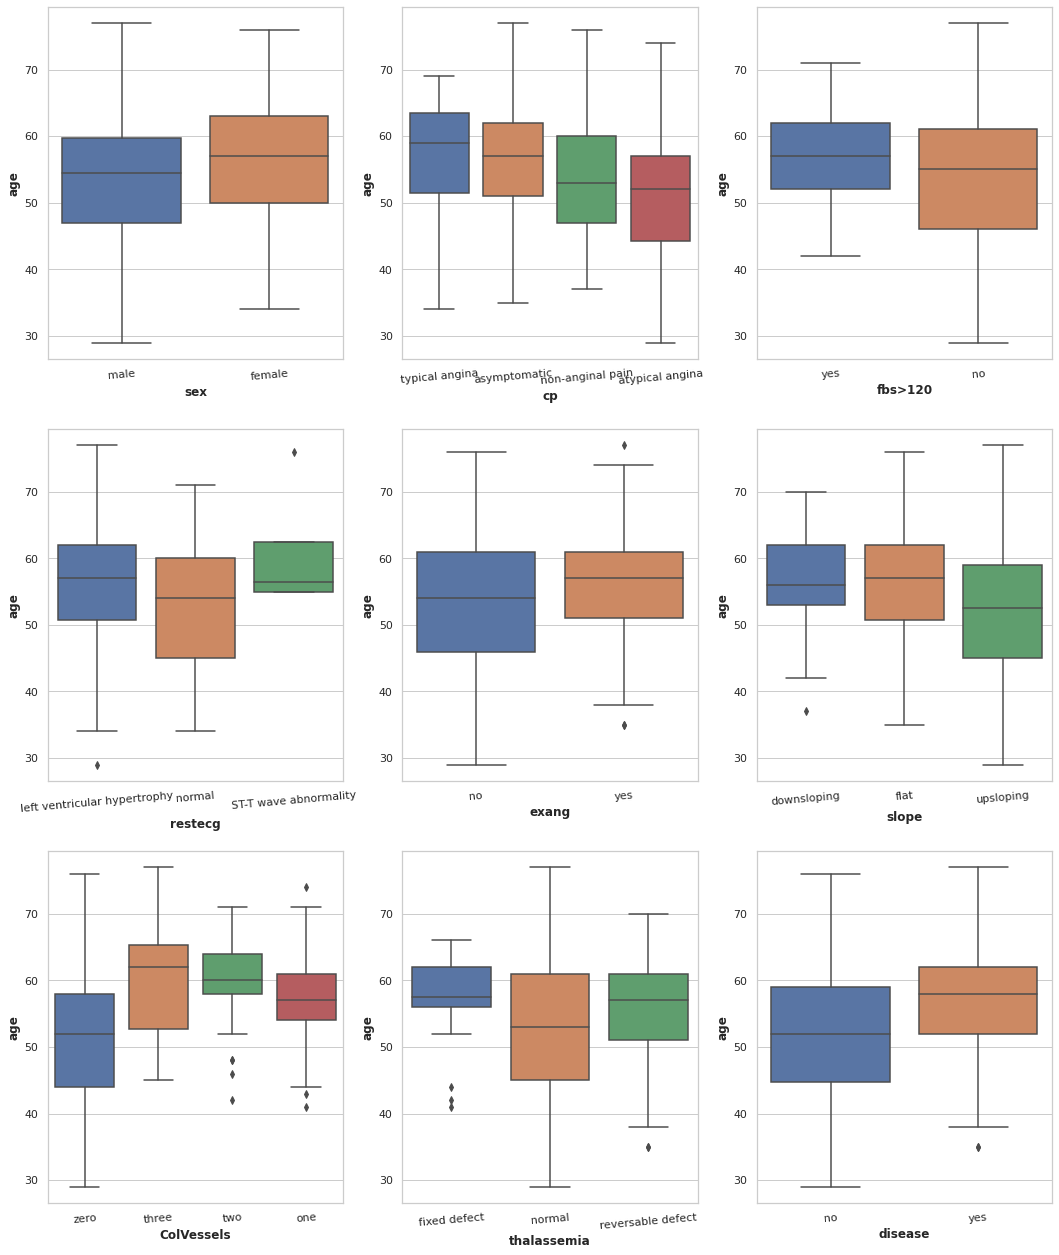

In [ ]:
fig = plt.figure(figsize = (18,22))

dfCatg = df.select_dtypes([object])
n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=5)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y=df["age"], data=df)

# resting blood pressure vs categorical - boxplots

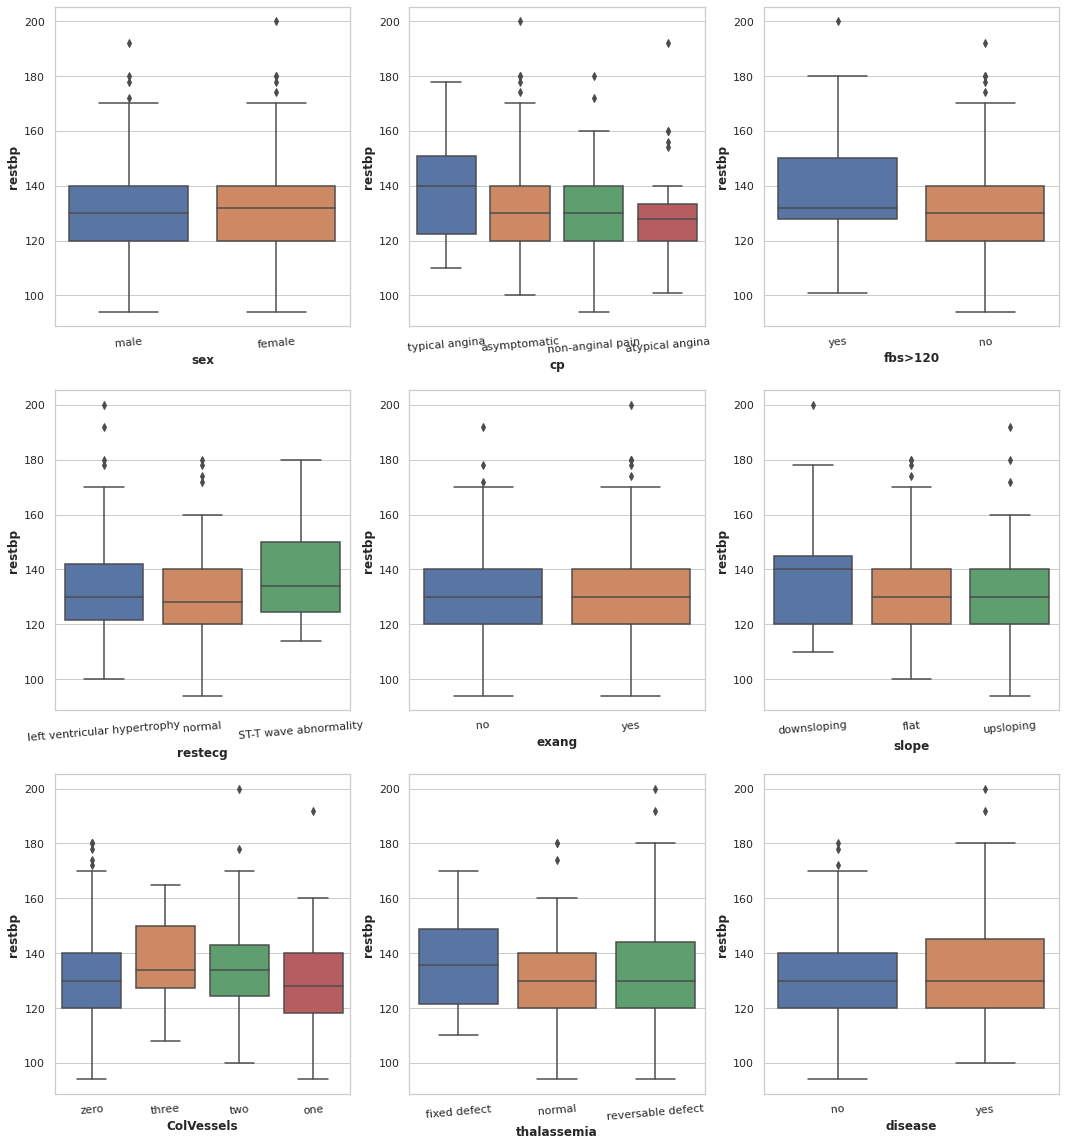

In [ ]:
fig = plt.figure(figsize = (18,20))

dfCatg = df.select_dtypes([object])
n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=5)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y=df["restbp"], data=df)

# cholesterol vs categorical - boxplot

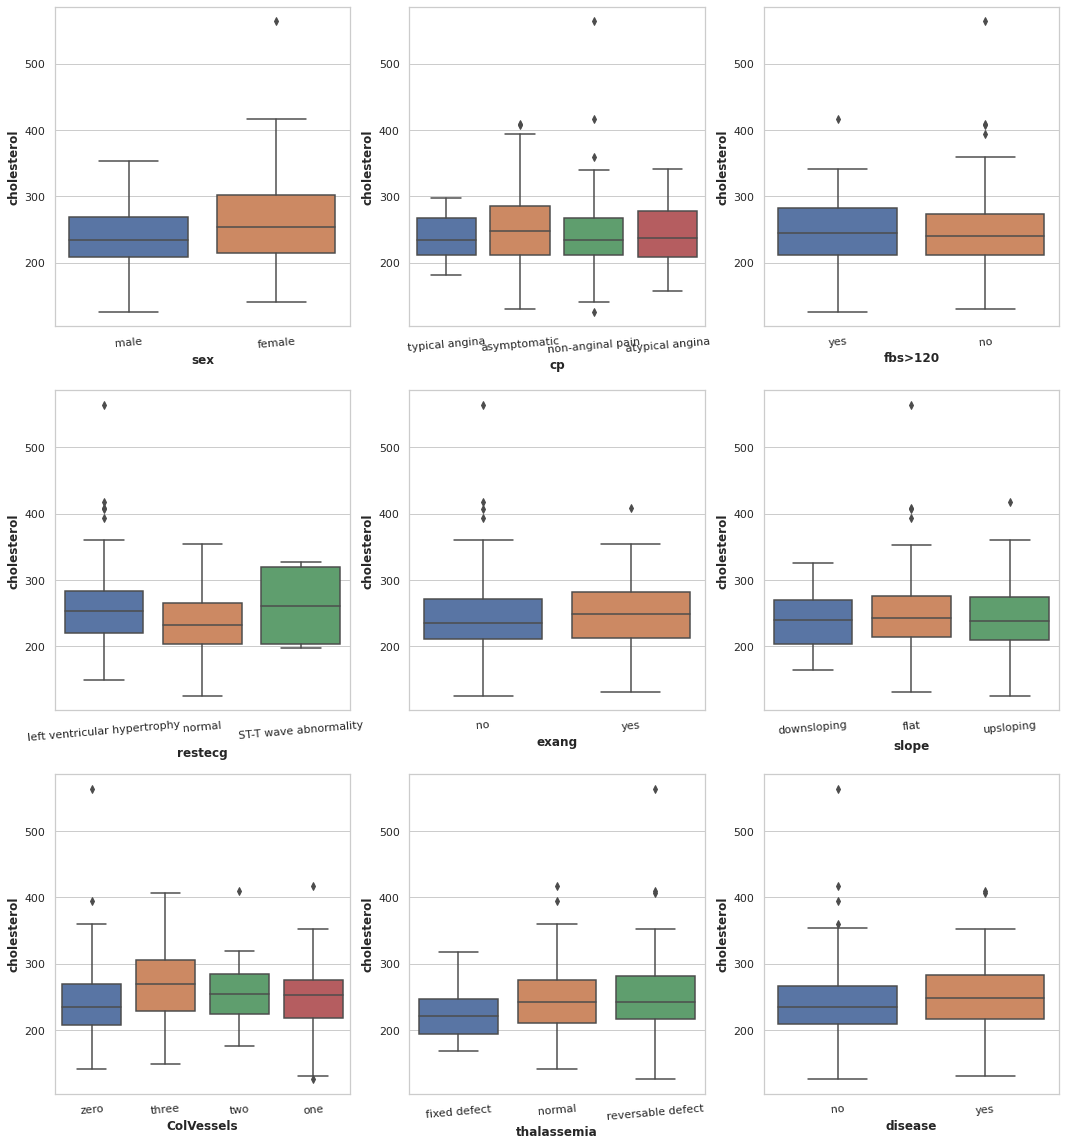

In [ ]:
fig = plt.figure(figsize = (18,20))

dfCatg = df.select_dtypes([object])
n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=5)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y=df["cholesterol"], data=df)


# thalach vs categorical - boxplots

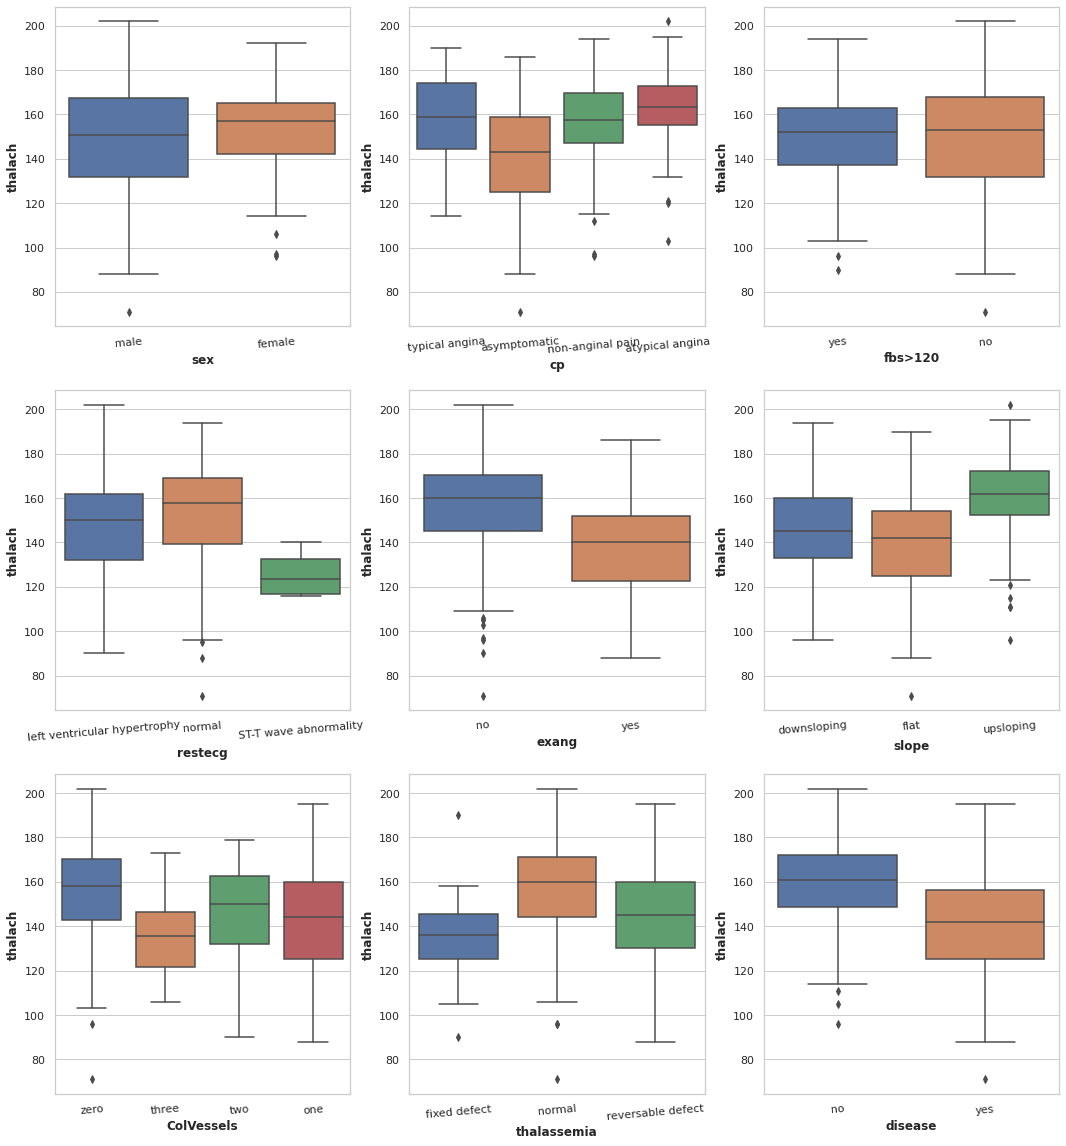

In [ ]:
fig = plt.figure(figsize = (18,20))

dfCatg = df.select_dtypes([object])
n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=5)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y=df["thalach"], data=df)


# old peak vs categorical - boxplot

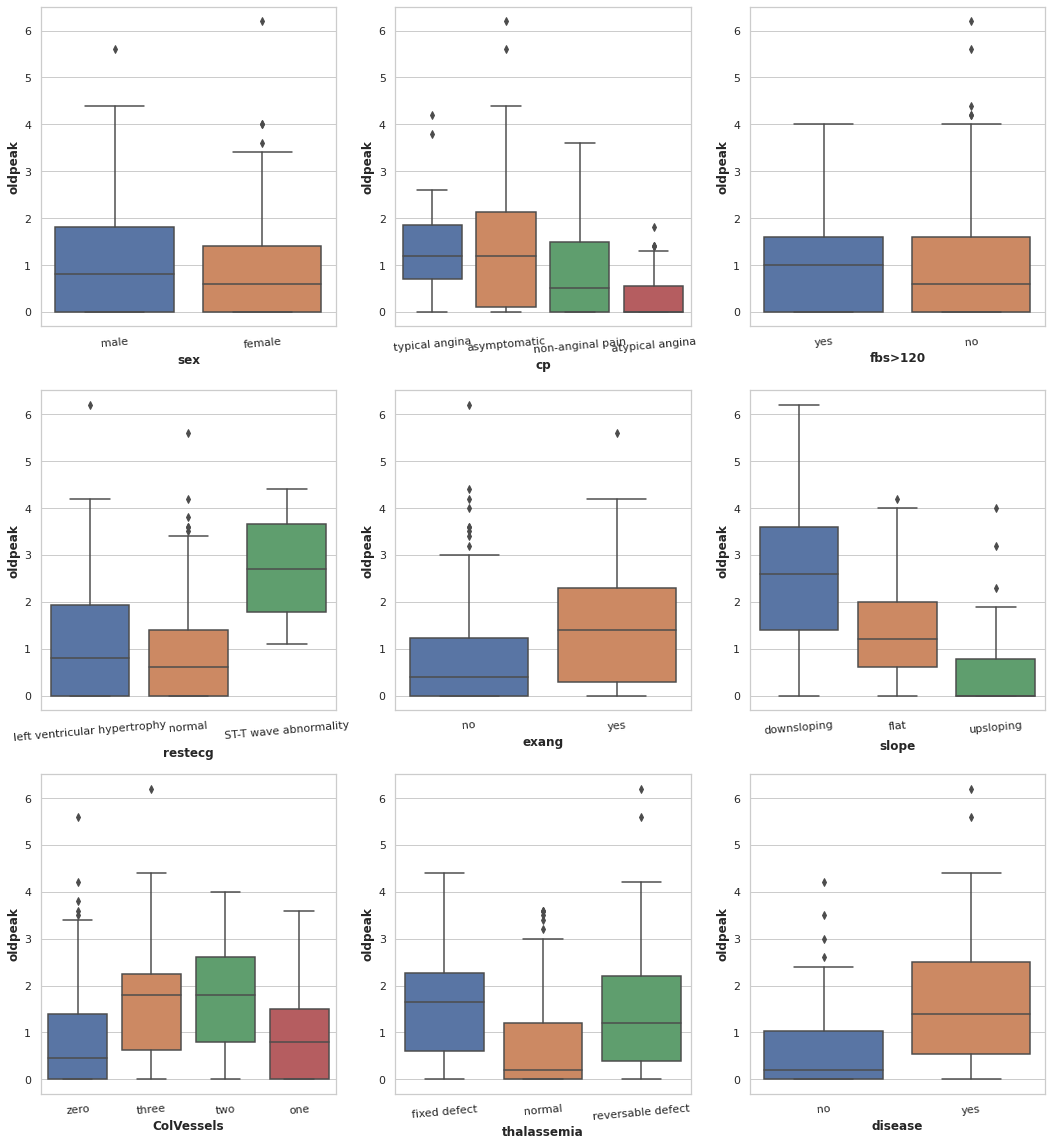

In [ ]:
fig = plt.figure(figsize = (18,20))

dfCatg = df.select_dtypes([object])
n = len(dfCatg.columns)
ax = [None] * n
c=3
row = math.ceil(n/c)

for i, col in enumerate(dfCatg.columns):
    ax[i] = fig.add_subplot(row,c,i+1)
    plt.xticks(rotation=5)
    # plt.figure(i)
    ax[i].set_xlabel(ax[i].get_xlabel(), fontdict={'weight': 'bold'})
    ax[i].set_ylabel(ax[i].get_ylabel(), fontdict={'weight': 'bold'})
    sns.boxplot(x=col, y=df["oldpeak"], data=df)

# Classification

In [ ]:
df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63,male,typical angina,145.0,233.0,yes,left ventricular hypertrophy,150.0,no,2.3,downsloping,zero,fixed defect,no
1,67,male,asymptomatic,160.0,286.0,no,left ventricular hypertrophy,108.0,yes,1.5,flat,three,normal,yes
2,67,male,asymptomatic,120.0,229.0,no,left ventricular hypertrophy,129.0,yes,2.6,flat,two,reversable defect,yes
3,37,male,non-anginal pain,130.0,250.0,no,normal,187.0,no,3.5,downsloping,zero,normal,no
4,41,female,atypical angina,130.0,204.0,no,left ventricular hypertrophy,172.0,no,1.4,upsloping,zero,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,typical angina,110.0,264.0,no,normal,132.0,no,1.2,flat,zero,reversable defect,yes
299,68,male,asymptomatic,144.0,193.0,yes,normal,141.0,no,3.4,flat,two,reversable defect,yes
300,57,male,asymptomatic,130.0,131.0,no,normal,115.0,yes,1.2,flat,one,reversable defect,yes
301,57,female,atypical angina,130.0,236.0,no,left ventricular hypertrophy,174.0,no,0.0,flat,one,normal,yes


# Label Encoding

In [ ]:
# By default (deep=True, any changes made in the 
# original DataFrame will NOT be reflected in the copy.
LE_df = df.copy(deep=True)
print(LE_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   restbp       303 non-null    float64
 4   cholesterol  303 non-null    float64
 5   fbs>120      303 non-null    object 
 6   restecg      303 non-null    object 
 7   thalach      303 non-null    float64
 8   exang        303 non-null    object 
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    object 
 11  ColVessels   303 non-null    object 
 12  thalassemia  303 non-null    object 
 13  disease      303 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 33.3+ KB
None


In [ ]:
LE_df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63,male,typical angina,145.0,233.0,yes,left ventricular hypertrophy,150.0,no,2.3,downsloping,zero,fixed defect,no
1,67,male,asymptomatic,160.0,286.0,no,left ventricular hypertrophy,108.0,yes,1.5,flat,three,normal,yes
2,67,male,asymptomatic,120.0,229.0,no,left ventricular hypertrophy,129.0,yes,2.6,flat,two,reversable defect,yes
3,37,male,non-anginal pain,130.0,250.0,no,normal,187.0,no,3.5,downsloping,zero,normal,no
4,41,female,atypical angina,130.0,204.0,no,left ventricular hypertrophy,172.0,no,1.4,upsloping,zero,normal,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,male,typical angina,110.0,264.0,no,normal,132.0,no,1.2,flat,zero,reversable defect,yes
299,68,male,asymptomatic,144.0,193.0,yes,normal,141.0,no,3.4,flat,two,reversable defect,yes
300,57,male,asymptomatic,130.0,131.0,no,normal,115.0,yes,1.2,flat,one,reversable defect,yes
301,57,female,atypical angina,130.0,236.0,no,left ventricular hypertrophy,174.0,no,0.0,flat,one,normal,yes


In [ ]:
from sklearn import preprocessing

labelencoder = preprocessing.LabelEncoder()
catgCols = ( df.select_dtypes([object]) ).columns

for i,col in enumerate(catgCols):
    LE_df[col] = labelencoder.fit_transform(LE_df[col])

In [ ]:
LE_df

,age,sex,cp,restbp,cholesterol,fbs>120,restecg,thalach,exang,oldpeak,slope,ColVessels,thalassemia,disease
0,63,1,3,145.0,233.0,1,1,150.0,0,2.3,0,3,0,0
1,67,1,0,160.0,286.0,0,1,108.0,1,1.5,1,1,1,1
2,67,1,0,120.0,229.0,0,1,129.0,1,2.6,1,2,2,1
3,37,1,2,130.0,250.0,0,2,187.0,0,3.5,0,3,1,0
4,41,0,1,130.0,204.0,0,1,172.0,0,1.4,2,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,3,110.0,264.0,0,2,132.0,0,1.2,1,3,2,1
299,68,1,0,144.0,193.0,1,2,141.0,0,3.4,1,2,2,1
300,57,1,0,130.0,131.0,0,2,115.0,1,1.2,1,0,2,1
301,57,0,1,130.0,236.0,0,1,174.0,0,0.0,1,0,1,1


# RECALL

In [ ]:
# 0 - no disease
# 1- disease

# TN FP
# FN TP

def calcRecall(matrix):
    TN = matrix[0][0]
    FP = matrix[0][1]
    FN = matrix[1][0]
    TP = matrix[1][1]

    Recall = TP/(TP+FN)

    return(Recall)


# Split df : target and attributes

In [ ]:
X = LE_df.iloc[:, :-1].values
y = LE_df.iloc[:, -1].values

# SVM

**SVM : Linear**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
for c in np.arange(0.0001,0.11,0.005):
    classifier = SVC(C= c, kernel='linear')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    cm_test = confusion_matrix(y_pred, y_test)
    # print(cm_test)
    acc =(cm_test[0][0] + cm_test[1][1])/len(y_test)
    print(f'c : {c} | Accuracy : {acc} | Recall : {calcRecall(cm_test)}')


# print("\n")
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
# disp.plot()

c : 0.0001 | Accuracy : 0.7049180327868853 | Recall : 0.8181818181818182
c : 0.0051 | Accuracy : 0.7704918032786885 | Recall : 0.9090909090909091
c : 0.0101 | Accuracy : 0.7868852459016393 | Recall : 0.9130434782608695
c : 0.015099999999999999 | Accuracy : 0.8032786885245902 | Recall : 0.8846153846153846
c : 0.0201 | Accuracy : 0.8524590163934426 | Recall : 0.96
c : 0.0251 | Accuracy : 0.8688524590163934 | Recall : 0.9615384615384616
c : 0.0301 | Accuracy : 0.9016393442622951 | Recall : 0.9642857142857143
c : 0.035100000000000006 | Accuracy : 0.8852459016393442 | Recall : 0.9310344827586207
c : 0.040100000000000004 | Accuracy : 0.8852459016393442 | Recall : 0.9310344827586207
c : 0.0451 | Accuracy : 0.8688524590163934 | Recall : 0.9285714285714286
c : 0.050100000000000006 | Accuracy : 0.8688524590163934 | Recall : 0.9
c : 0.0551 | Accuracy : 0.8688524590163934 | Recall : 0.9
c : 0.0601 | Accuracy : 0.8524590163934426 | Recall : 0.8709677419354839
c : 0.0651 | Accuracy : 0.8524590163934

0 - no disease\
1- disease

TN  FP\
FN  TP

**SVM : RBF**


Accuracy for test set for SVM_rbf = 0.6721311475409836

Recall : 0.8333333333333334



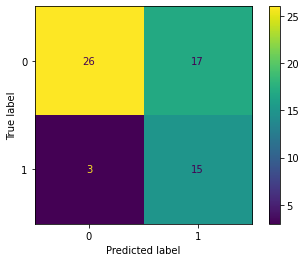

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for SVM_rbf = {}\n'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')


disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()


# Naive Bayes


Accuracy for test set for Naive Bayes = 0.8524590163934426
Recall : 0.9259259259259259





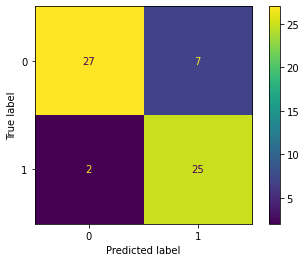

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# DT


Accuracy for test set for Decision Tree = 0.8360655737704918
Recall : 0.84375





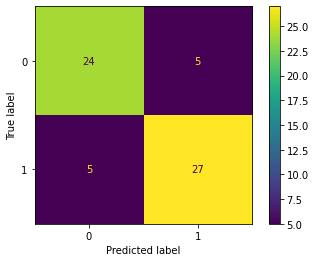

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# KNN


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

for n in range(5,25,1):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    cm_test = confusion_matrix(y_pred, y_test)
    # print(cm_test)
    
    acc =(cm_test[0][0] + cm_test[1][1])/len(y_test)
    print(f'neighbours : {n} | Accuracy : {acc} | Recall : {calcRecall(cm_test)}')

neighbours : 5 | Accuracy : 0.6721311475409836 | Recall : 0.7307692307692307
neighbours : 6 | Accuracy : 0.6721311475409836 | Recall : 0.8
neighbours : 7 | Accuracy : 0.7213114754098361 | Recall : 0.7777777777777778
neighbours : 8 | Accuracy : 0.6721311475409836 | Recall : 0.8
neighbours : 9 | Accuracy : 0.7213114754098361 | Recall : 0.7586206896551724
neighbours : 10 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 11 | Accuracy : 0.6885245901639344 | Recall : 0.7407407407407407
neighbours : 12 | Accuracy : 0.7049180327868853 | Recall : 0.8181818181818182
neighbours : 13 | Accuracy : 0.6721311475409836 | Recall : 0.7142857142857143
neighbours : 14 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 15 | Accuracy : 0.6557377049180327 | Recall : 0.7037037037037037
neighbours : 16 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 17 | Accuracy : 0.6885245901639344 | Recall : 0.76
neighbours : 18 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 


# Logistic


Accuracy for test set for Logistic Regression = 0.8524590163934426
Recall : 0.8709677419354839





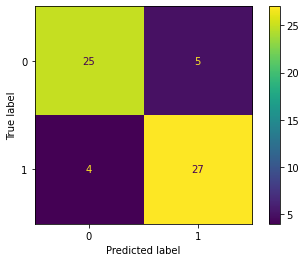

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# One-Hot Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

OHE_df = df.copy(deep=True)
OHE_df.info()
catgCols = ( df.select_dtypes([object]) ).columns

OHE_df = pd.get_dummies(OHE_df, columns = catgCols)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          303 non-null    int64  
 1   sex          303 non-null    object 
 2   cp           303 non-null    object 
 3   restbp       303 non-null    float64
 4   cholesterol  303 non-null    float64
 5   fbs>120      303 non-null    object 
 6   restecg      303 non-null    object 
 7   thalach      303 non-null    float64
 8   exang        303 non-null    object 
 9   oldpeak      303 non-null    float64
 10  slope        303 non-null    object 
 11  ColVessels   303 non-null    object 
 12  thalassemia  303 non-null    object 
 13  disease      303 non-null    object 
dtypes: float64(4), int64(1), object(9)
memory usage: 33.3+ KB


In [ ]:
OHE_df

,age,restbp,cholesterol,thalach,oldpeak,sex_female,sex_male,cp_asymptomatic,cp_atypical angina,cp_non-anginal pain,...,slope_upsloping,ColVessels_one,ColVessels_three,ColVessels_two,ColVessels_zero,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect,disease_no,disease_yes
0,63,145.0,233.0,150.0,2.3,0,1,0,0,0,...,0,0,0,0,1,1,0,0,1,0
1,67,160.0,286.0,108.0,1.5,0,1,1,0,0,...,0,0,1,0,0,0,1,0,0,1
2,67,120.0,229.0,129.0,2.6,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
3,37,130.0,250.0,187.0,3.5,0,1,0,0,1,...,0,0,0,0,1,0,1,0,1,0
4,41,130.0,204.0,172.0,1.4,1,0,0,1,0,...,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,110.0,264.0,132.0,1.2,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,1
299,68,144.0,193.0,141.0,3.4,0,1,1,0,0,...,0,0,0,1,0,0,0,1,0,1
300,57,130.0,131.0,115.0,1.2,0,1,1,0,0,...,0,1,0,0,0,0,0,1,0,1
301,57,130.0,236.0,174.0,0.0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,1


# Split df : target and attributes

In [ ]:
X = OHE_df.iloc[:, :-1].values
y = OHE_df.iloc[:, -1].values

# SVM

**Kernel : Linear**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)
for c in np.arange(0.0001,0.11,0.005):
    classifier = SVC(C= c, kernel='linear')
    classifier.fit(X_train, y_train)

    y_pred = classifier.predict(X_test)

    cm_test = confusion_matrix(y_pred, y_test)
    # print(cm_test)
    acc =(cm_test[0][0] + cm_test[1][1])/len(y_test)
    print(f'c : {c} | Accuracy : {acc} | Recall : {calcRecall(cm_test)}')


# print("\n")
# from sklearn.metrics import ConfusionMatrixDisplay
# disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
# disp.plot()

c : 0.0001 | Accuracy : 0.7049180327868853 | Recall : 0.8181818181818182
c : 0.0051 | Accuracy : 0.8524590163934426 | Recall : 0.96
c : 0.0101 | Accuracy : 0.9180327868852459 | Recall : 0.9655172413793104
c : 0.015099999999999999 | Accuracy : 0.9672131147540983 | Recall : 1.0
c : 0.0201 | Accuracy : 1.0 | Recall : 1.0
c : 0.0251 | Accuracy : 1.0 | Recall : 1.0
c : 0.0301 | Accuracy : 1.0 | Recall : 1.0
c : 0.035100000000000006 | Accuracy : 1.0 | Recall : 1.0
c : 0.040100000000000004 | Accuracy : 1.0 | Recall : 1.0
c : 0.0451 | Accuracy : 1.0 | Recall : 1.0
c : 0.050100000000000006 | Accuracy : 1.0 | Recall : 1.0
c : 0.0551 | Accuracy : 1.0 | Recall : 1.0
c : 0.0601 | Accuracy : 1.0 | Recall : 1.0
c : 0.0651 | Accuracy : 1.0 | Recall : 1.0
c : 0.07010000000000001 | Accuracy : 1.0 | Recall : 1.0
c : 0.0751 | Accuracy : 1.0 | Recall : 1.0
c : 0.0801 | Accuracy : 1.0 | Recall : 1.0
c : 0.08510000000000001 | Accuracy : 1.0 | Recall : 1.0
c : 0.0901 | Accuracy : 1.0 | Recall : 1.0
c : 0.0951

**Kernel : Radial**


Accuracy for test set for SVM_rbf = 0.6557377049180327
Recall : 0.7894736842105263





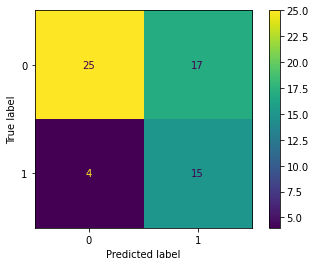

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.svm import SVC

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

classifier = SVC(kernel='rbf')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)
acc =(cm_test[0][0] + cm_test[1][1])/len(y_test)
print(f'c : {c} | Accuracy : {acc} | Recall : {calcRecall(cm_test)}')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# Naive Bayes


Accuracy for test set for Naive Bayes = 1.0
Recall : 1.0





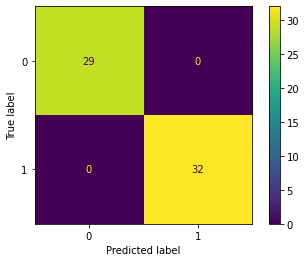

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Naive Bayes = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# DT


Accuracy for test set for Decision Tree = 1.0
Recall : 1.0





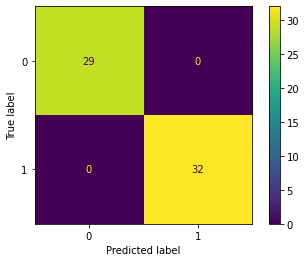

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Decision Tree = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

print("\n")
from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(
			X, y, test_size = 0.2, random_state=42)

for n in range(5,25,1):
    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X_train, y_train)

    # Predicting the Test set results
    y_pred = classifier.predict(X_test)

    cm_test = confusion_matrix(y_pred, y_test)
    # print(cm_test)

    acc =(cm_test[0][0] + cm_test[1][1])/len(y_test)
    print(f'neighbours : {n} | Accuracy : {acc} | Recall : {calcRecall(cm_test)}')

neighbours : 5 | Accuracy : 0.6721311475409836 | Recall : 0.7307692307692307
neighbours : 6 | Accuracy : 0.6721311475409836 | Recall : 0.8
neighbours : 7 | Accuracy : 0.7213114754098361 | Recall : 0.7777777777777778
neighbours : 8 | Accuracy : 0.6721311475409836 | Recall : 0.8
neighbours : 9 | Accuracy : 0.7213114754098361 | Recall : 0.7586206896551724
neighbours : 10 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 11 | Accuracy : 0.6885245901639344 | Recall : 0.7407407407407407
neighbours : 12 | Accuracy : 0.7213114754098361 | Recall : 0.8260869565217391
neighbours : 13 | Accuracy : 0.6885245901639344 | Recall : 0.7407407407407407
neighbours : 14 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 15 | Accuracy : 0.6721311475409836 | Recall : 0.7307692307692307
neighbours : 16 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 17 | Accuracy : 0.6885245901639344 | Recall : 0.76
neighbours : 18 | Accuracy : 0.6721311475409836 | Recall : 0.75
neighbours : 

# Logistic


Accuracy for test set for Logistic Regression = 1.0
Recall : 1.0



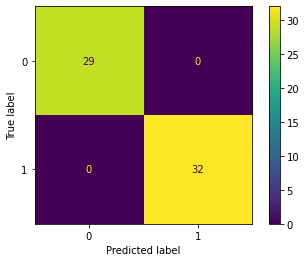

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)
# print(cm_test)

print()
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))
print(f'Recall : {calcRecall(cm_test)}\n')

from sklearn.metrics import ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm_test, display_labels=classifier.classes_)
disp.plot()